# *WoMG*: tutorial

This is a tutorial for *WoMG*. The WoMG software generates synthetic datasets of documents cascades on network. It starts with any (un)directed, (un)weighted graph and a collection of documents and it outputs the propagation DAGs of the docs through the network. Diffusion process is guided by the nodes underlying preferences.


First section will introduce a demo of the software.

Second section will provide a basic usage with the [Digg](https://www.isi.edu/~lerman/downloads/digg2009.html) dataset used in the thesis. Digg dataset contains a network dataset and a propagation dataset.

The Analysis section will analyse the synthetic dataset of propagations generated by WoMG using the Digg network as input graph; the real propagation values are reported at the end of the previous section. 

The statistics section is used for simulating different propagations with different parameters and plotting the results; this kind of statistics needs lot of computation by WoMG, so synthetic datasets are already produced.

### TOC:
* [Demo](#Demo)
* [Help](#Help)
* [Usage](#Usage)
* [Analysis](#Analysis)
* [Statistics](#Statistics)

## Demo

WoMG can be used both in command line and Jupyter notebook. The following codes will run WoMG with the default parameters.

##### command line:

In [4]:
%run ../src/womg/__main__.py

 30%|███       | 3/10 [00:00<00:00, 28.04it/s]

Loading graph
No graph path provided 
 DEMO Mode: generating cascades in les miserables network
Formatting graph:
Generating interests:
../data/graph/lesmiserables/lesmiserables_edgelist.txt
Walk iteration:


100%|██████████| 77/77 [00:00<00:00, 3669.81it/s]


Computing interest vectors: 
Reducing dimensions from  128  to  15
Setting LDA in generative mode:  100  documents, with  15  topics.
Training the LDA model ..


  0%|          | 0/100 [00:00<?, ?it/s]

Computing cascades: 



100%|██████████| 100/100 [00:00<00:00, 103.75it/s]/s]


##### Jupyter notebook:

In [5]:
import sys
import pathlib
path = pathlib.Path("../src")
sys.path.insert(0, str(path))
from __main__ import womg_main

womg_main()

 30%|███       | 3/10 [00:00<00:00, 26.27it/s]

Loading graph
No graph path provided 
 DEMO Mode: generating cascades in les miserables network
Formatting graph:
Generating interests:
../data/graph/lesmiserables/lesmiserables_edgelist.txt
Walk iteration:


100%|██████████| 77/77 [00:00<00:00, 3876.34it/s]


Computing interest vectors: 
Reducing dimensions from  128  to  15
Setting LDA in generative mode:  100  documents, with  15  topics.
Training the LDA model ..


  0%|          | 0/100 [00:00<?, ?it/s]

Computing cascades: 



100%|██████████| 100/100 [00:00<00:00, 107.47it/s]s]


Checking the outputs

In [6]:
!cd ../Output/ ; ls ; #cat Diffusion_formatted_output_sim0.txt

Diffusion_formatted_output_sim0.txt  Network_interests_influence_sim0.txt
Diffusion_formatted_output_sim1.txt  Network_interests_influence_sim1.txt
Diffusion_formatted_output_sim2.txt  Network_interests_influence_sim2.txt
Diffusion_formatted_output_sim3.txt  Network_interests_influence_sim3.txt
Diffusion_formatted_output_sim4.txt  Network_interests_influence_sim4.txt
Diffusion_formatted_output_sim5.txt  Network_interests_influence_sim5.txt
Diffusion_formatted_output_sim6.txt  Network_interests_influence_sim6.txt
Diffusion_formatted_output_sim7.txt  Network_interests_influence_sim7.txt
Diffusion_formatted_output_sim8.txt  Network_interests_influence_sim8.txt
Diffusion_formatted_output_sim9.txt  Network_interests_influence_sim9.txt
Network_graph_sim0.txt               Topic_topic_distrib_sim0.txt
Network_graph_sim1.txt               Topic_topic_distrib_sim1.txt
Network_graph_sim2.txt               Topic_topic_distrib_sim2.txt
Network_graph_sim3.txt               Topic_topic_distrib_sim3.



## Help

Let's check the parameters by the help page:

In [7]:
help(womg_main)

Help on function womg_main in module __main__:

womg_main(numb_topics=15, numb_docs=None, numb_steps=100, homophily=0.5, actives_perc=0.05, virality=1, path_in_graph=None, method='node2interests', weighted=False, directed=False, god_node=False, docs_path=None, path_out=None, fformat='txt', seed=None, dimensions=128, walk_length=80, num_walks=10, window_size=10, iiter=1, workers=8, p=1, q=1)
    --------------------------------------------------------------------
    WoMG main function: 
    
    The *WoMG* software generates synthetic datasets of documents cascades on network. 
    It starts with any (un)directed, (un)weighted graph and a collection of documents 
    and it outputs the propagation DAGs of the docs through the network. 
    Diffusion process is guided by the nodes underlying preferences. 
    Please check the github page for more details.
    
    
    Parameters
    ----------
    numb_topics : int
        number of topics in the topic model. Default 15. K<d 
    
    

First set of quantitative parameters are:

1. number of topics to be considered in the topic distributions of documents and nodes interests; it has to be less than number of dimensions of the nodes' space provided by node2vec
2. number of documents TO BE GENERATED by lda, giving this parameter lda will be directly set to generative mode
3. steps of the diffusion simulation
4. H degree of homophily. Node2vec is used as baseline for generating interests vectors of the nodes starting from the given graph. Parameters *p* and *q* can achieve different decoded degree of homophily and structural equivalence (see paper). The best mix of them can be achieved only by a deep analysis of the network and a grid searh on the parameters. In order to pursuit generality in the input graph we use three degree of mixing: structural equivalence predominant, deepWalk (p=1, q=1), homophily predominant (which are not the best for representing the graph!).  1-H is the degree of social influence between nodes; which is the percentage of the avg interests vecs norms to be assigned to the influence vectors.
5. percentage of active nodes with respect to the total number of nodes in the intial configuration (before diffusion) for each doc.
6. virality of the doc; if virality is high, exponent of the power law is high and threshold for activation is low.


Next parameters concern input graph, input documents and the node2vec original parameters.

## Usage

The following code will produce a synthetic propagation dataset on the [Digg network dataset](https://www.isi.edu/~lerman/downloads/digg2009.html). This dataset consists in: graph dataset and diffusion dataset. We used the first as input of WoMG for generating diffusions and analyse results. 

We set:

1. the number of steps equal to 100
2. the maximum percentage of active nodes per doc equal to 0.065
3. number of generated docs equal to 3553
4. virality exponent of the docs distribution equal to 0.009

In [ ]:
#!python3 ../src/womg/__main__.py --graph ../data/graph/digg/digg_edgelist.txt --directed --steps 100 --actives 0.065 --docs 3553  --virality 0.009

##### Output

The analysis of the actions using digg network as input can be done using simulation_index=_tutorial.

The real dataset analysis provides the following results:

    items actions [max, min, avg]:   6265 105 505

    users actions [max, min, avg]:   3415 20 115

## Analysis

Let's check the synthetic dataset results:

In [5]:
import ast
import pathlib
import numpy as np

In [6]:
simulation_index = "_tutorial"
output_path = pathlib.Path.cwd() / "Output"

In [7]:
file_info = output_path / str("Network_info_sim"+str(simulation_index)+".txt")
file_prop = output_path / str("Diffusion_formatted_output_sim"+str(simulation_index)+".txt")

###### import functions

In [8]:
def extract(file_in):
    '''
    Returns file from the given input path
    '''
    if str(pathlib.Path(file_in).suffix) == '.txt':
        with open(file_in, 'r') as f:
            s = f.readlines()
    if str(pathlib.Path(file_in).suffix) == '.pickle':
        with open(file_in, 'rb') as f:
            s = pickle.load(f)
    return s

In [9]:
def to_dict(inp, typ=False):
    '''
    if typ:
        Returns info input (inp) in dict format
    if not typ:
        Returns cascades in a dict format:
        (outer)first key: time, (inner)second key: item, 
        value: new active nodes
    '''
    
    if typ:
        info_dict = ast.literal_eval(str(inp).replace('[','').replace(']','').replace('"',''))
        out_dict = info_dict
        
    else:   
        prop_dict = {}
        index = 0
        for i in range(2, len(prop), 2):
            inp[i] = inp[i].replace('\n', '')
            inp[i] = inp[i].replace('set()','None')
            prop_dict[index] = ast.literal_eval(prop[i])
            index += 1

        out_dict = prop_dict
           
    return out_dict

In [10]:
info_str = extract(file_info)
info = to_dict(info_str, typ=True)
prop = extract(file_prop)
cascades = to_dict(prop, typ=False)

##### analysis functions

In [11]:
# items actions
def items_actions(cascades, plot=False):
    '''
    Returns the vector of all items' actions
    each entry is the the number of activations(actions)
    for the item identified by entry-index
    '''
    numb_docs = max(cascades[0].keys())
    items_action_vec = [0 for i in range(numb_docs+1)]
    for step in cascades.keys():
        for item in cascades[step].keys():
            if cascades[step][item] != None:
                items_action_vec[item] += len(cascades[step][item])
            #if cascades[step][item] == None:
                #print(item)
    #print(items_action_vec)
    if plot:
        plt.hist(items_action_vec)
        plt.show()
    
    print('items actions [max, min, avg]: ', int(max(items_action_vec)), int(min(items_action_vec)), int(np.mean(items_action_vec)))
    return items_action_vec

In [12]:
items_data = items_actions(cascades)

items actions [max, min, avg]:  7559 0 505


In [13]:
# users actions
def users_actions(cascades, info):
    '''
    Returns the vector of all users' actions
    each entry is the the number of activations(actions)
    for the user identified by entry-index
    '''
    numb_nodes = int(info['numb_nodes'])
 
        
    # defining dict
    users_actions_dict = {}
    for step in cascades.keys():
        for item in cascades[step].keys():
            if cascades[step][item] != None:
                for node in cascades[step][item]:
                    users_actions_dict[node] = 0
                    
    # counting            
    for step in cascades.keys():
        for item in cascades[step].keys():
            if cascades[step][item] != None:
                for node in cascades[step][item]:
                    users_actions_dict[node] += 1
                    
    users_actions_vec = [0 for i in range(numb_nodes)]
    for key, index in zip(sorted(users_actions_dict.keys()), range(numb_nodes)):
        users_actions_vec[index] = users_actions_dict[key]
    
    print('users actions [max, min, avg]: ',int(max(users_actions_vec)),
          int(min(users_actions_vec)), int(np.mean(users_actions_vec)))
    return users_actions_vec

In [15]:
users_data = users_actions(cascades, info)

users actions [max, min, avg]:  157 73 113


## Statistics

In [16]:
import sys
import pathlib
path = pathlib.Path("../src")
sys.path.insert(0, str(path))
from __main__ import womg_main

In [18]:
def simulate(viralities, actives, topics, numb_docs=None, graph=None, directed=False):
    '''
    Run womg with different sets of parameters

        Parameters
        ----------
        numb_docs : int
            number of documents to be generated
            (Default None: you need to pass a docs folder path)

        viralities : iterable/float
            array containing viralitiy params

        actives : iterable/float
            array containing actives_perc params
            (percentage of actives nodes for an items in the initial step)

        topics : iterable/int
            array containing numb_topics params
            
        
        Notes
        -----
        See womg reference for more details: help(womg_main)
        
    '''
    for t in topics:
        for a in actives:
            for v in viralities:      
                womg_main(numb_topics=t, actives_perc=a, virality=v, numb_docs=numb_docs, 
                          path_in_graph=graph,
                          directed=directed)

In [19]:
# 2, 1, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0.01, 0.005
viralities = [2, 0.1]
actives = [0.4]
topics = [15]

simulate(numb_docs=3553, 
         viralities=viralities, 
         actives=actives, 
         topics=topics,
         graph='../data/graph/digg/digg_edgelist.txt',
         directed=True
        )

Loading graph


100%|██████████| 199860/199860 [00:00<00:00, 1066550.63it/s]

Formatting graph


Generating interests
../data/graph/digg/digg_edgelist.txt


  0%|          | 0/10 [00:00<?, ?it/s]

Walk iteration:


  2%|▏         | 315/15580 [00:00<00:04, 3141.11it/s]

Computing interest vectors: 


100%|██████████| 15580/15580 [00:03<00:00, 4057.38it/s]


Reducing dimensions from  128  to  15
Setting LDA in generative mode. Number of topics is set to  15
Training the LDA model ..


  0%|          | 0/100 [00:00<?, ?it/s]

Computing cascades: 


100%|██████████| 100/100 [1:02:11<00:00, 37.32s/it]  


Loading graph


100%|██████████| 199860/199860 [00:00<00:00, 1096877.92it/s]

Formatting graph



 10%|█         | 1/10 [00:00<00:01,  5.53it/s]

Generating interests
../data/graph/digg/digg_edgelist.txt
Walk iteration:


  2%|▏         | 358/15580 [00:00<00:04, 3578.60it/s]

Computing interest vectors: 


100%|██████████| 15580/15580 [00:03<00:00, 3972.06it/s]


Reducing dimensions from  128  to  15
Setting LDA in generative mode. Number of topics is set to  15
Training the LDA model ..


  0%|          | 0/100 [00:00<?, ?it/s]

Computing cascades: 


100%|██████████| 100/100 [45:12<00:00, 27.13s/it]   


In [ ]:
viralities = [2, 1, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0.01, 0.005]

In [20]:
### virality plot
from tqdm import tqdm
import pathlib
path = pathlib.Path('../Output/')

file_idx = [i for i in range(len(viralities))]
#file_idx = [0, 1]

y_item = []
x_item = []
y_user = []
x_user = []
cdf_data = {}
cdf_data['item'] = {}
cdf_data['user'] = {}
for i in tqdm(file_idx):
    file_info = path / str("Network_info_sim"+str(i)+".txt")
    file_prop = path / str("Diffusion_formatted_output_sim"+str(i)+".txt")
    # data for cdf plot
    cdf_data['item'][i] = []
    cdf_data['user'][i] = []
    ########################
    info_str = extract(file_info)
    info = to_dict(info_str, typ=True)
    prop = extract(file_prop)
    cascades = to_dict(prop, typ=False)
    items_data = items_actions(cascades, plot=False)
    users_data = users_actions(cascades, info=info)
    for n in range(len(items_data)):
        cdf_data['item'][i].append(items_data[n])
        y_item.append(items_data[n])
        x_item.append(viralities[i])
    for n in range(len(users_data)):
        cdf_data['user'][i].append(users_data[n])
        y_user.append(users_data[n])
        x_user.append(viralities[i])

  0%|          | 0/2 [00:00<?, ?it/s]

items actions [max, min, avg]:  19129 0 13163


 50%|█████     | 1/2 [04:21<04:21, 261.12s/it]

users actions [max, min, avg]:  3883 630 829
items actions [max, min, avg]:  19092 2 4298


100%|██████████| 2/2 [06:37<00:00, 223.84s/it]

users actions [max, min, avg]:  1926 629 733


##### violin plot

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


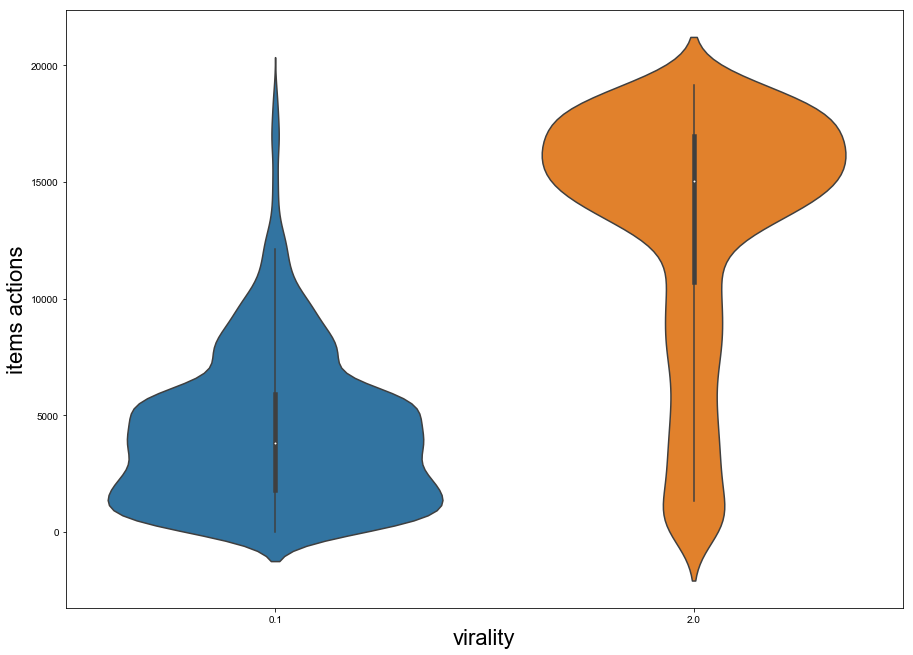

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns


fig = plt.figure(figsize=(15,11))

plt.xlabel('virality', fontsize=22)
plt.ylabel('items actions', fontsize=22)

ax = sns.violinplot(x=x_item, y=y_item)
sns.set()
plt.show()


#fig.savefig()

##### cdf plot

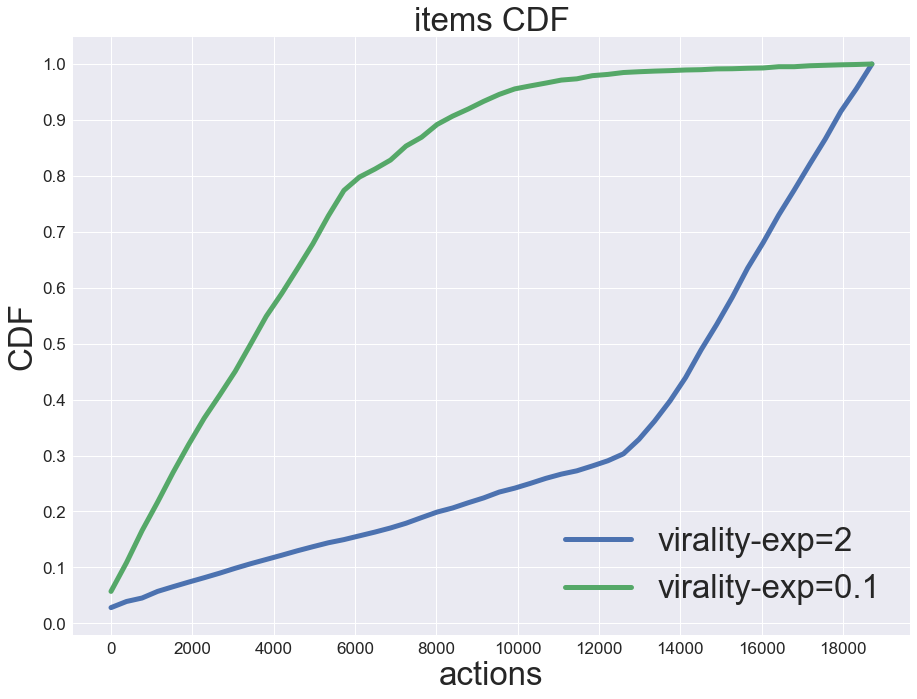

In [24]:
fig = plt.figure(figsize=(15,11))


file_idx = [i for i in range(len(viralities))]


cdf_hist = {}
cdf_hist['user'] = {}
cdf_hist['item'] = {}
for i in [0, 1]:
    # evaluate the histogram
    cumulative = []
    values, base = np.histogram(cdf_data['item'][i], bins=50)
    cdf_hist['item'][i] = (values, base)
    
for i in [0, 1]:
    #evaluate the cumulative
    cumulative = np.cumsum(cdf_hist['item'][i][0])/3553
    # plot the cumulative function
    plt.plot(base[:-1], cumulative, linewidth=5)
    #print(cumulative)
    plt.xlabel('actions', fontsize=33)
    plt.ylabel('CDF', fontsize=33)
    plt.tick_params(labelsize=17)
    #plt.yscale('log')
    #plt.xscale('log')
    plt.locator_params(axis='y', nbins=20)
    plt.locator_params(axis='x', nbins=20)
    plt.title('items CDF', fontsize=33)
    plt.legend(['virality-exp=2', 'virality-exp=0.1', 'virality-exp=0.11', 'virality-exp=0.45', 'virality-exp=0.45'], 
               fontsize=33)
plt.show()
#fig.savefig()

In [8]:
path = "/Users/Cinus/Downloads/quotes_2008-08.txt"
with open(path) as f:
    head = [next(f) for x in range(1000)]

In [9]:
import ast
l = ast.literal_eval(str(head))

In [22]:
path = '/Users/Cinus/Work/Progetti/WoMG/WoMG/data/docs/training_corpus2/'

c = 0
for i in l:
    filename = path + str(c) + '.txt'
    if i.startswith('Q'):
        with open(filename, 'a') as f:
            t = i.replace('Q', '').replace("\t", "")
            f.write(t)
        c += 1

In [24]:
with open('/Users/Cinus/Work/Progetti/WoMG/WoMG/data/docs/training_corpus2/1.txt') as f:
    for i in f:
        print(i)

videoplayer silverlight controls videoplayer videoplayer silverlight controls version 1 0 0 0 culture neutral publickeytoken null

